<a href="https://colab.research.google.com/github/ekaterinaPo/Task/blob/main/ML_End_to_End_Modeling_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div  align='center'><img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo_new_2.png' width='15%'></div >

<p style="font-size:30px;text-align:center"><b>ML End-to-End Modeling Exercise</b></p>
<p style="font-size:20px;text-align:center"><b><font color='#F39A54'>(Student)</font></b></p>
<p style="font-size:20px;text-align:center"><b>ML Engineer Bootcamp</b></p>

<br>
<center align="center"> Designed by: </center>
<center align="center"> WeCloudData Academy </center>

## Table of Content <a name='toc'></a>
* ### [Challenge: ML with Scikit-learn](#sklearn)
    * [1 - Data Preparation](#sklearn-data-prep)
    * [2 - Sampling and Data Split](#sklearn-split)
    * [3 - Data Exploration](#sklearn-explore)
    * [4 - Feature Prerprocessing](#sklearn-feature)
    * [5 - Feature Selection](#sklearn-feature-selection)
    * [6 - Model Fitting](#sklearn-fit)
    * [7 - Model Evaluation](#sklearn-eval)
    * [8 - Hyper-parameter Tuning](#sklearn-tuning)
    * [9 - Cross-Validation](#sklearn-cv)
    * [10 - Interpretation](#sklearn-explain)



## Goal of this exercise:

> During the first two weeks of the Bootcamp, we reviewed some classic ML algorithms. In practice, machine learning engineers and dats scientists spend quite a bit effort on data preparation, feature engineering, and ml pipelines. In the later half of deep learning, we will focus more on unstructured data such as images and text. So we'd like to give everyone a chance to complete an end to end ML pipeline (training your models up to evaluation). This will help us get prepared for term 2: MLOps, where we will be deploying the model we build in this exercise.  

### Requirements

1. Follow these steps to complete the model building (you don't have to stick to it as some data scientists prefer to have slightly different process)
2. After training your models in the jupyter notebook, try to implement that in VSCode using python scripts. 

### Bonus points
3. Try to modularize your code as much as possible
4. Try to leverage ML pipeline features in scikit-learn [reference](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
5. Try to add customer transformer for feature engineering [example](https://www.section.io/engineering-education/custom-transformer/)

### Other notes
1. This is not an exam. No need to panic. 
2. Once you upload your solution, we will provide code review and give you feedback. 

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import torch

import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option('display.max_columns', None)  # allows displaying all columns in a dataframe 
pd.set_option('display.max_rows', 50)


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

---

# $\Sigma$ 5. Challenge: ML Classification with Scikit-learn <a name="sklearn"></a></a><font size='3'>[Back to TOC](#toc)</font>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

pd.set_option('display.max_columns', None)  # allows displaying all columns in a dataframe 
pd.set_option('display.max_rows', 50)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

## 5.1 - Data Preparation <a name="sklearn-data-prep"></a><font size='3'>[Back to TOC](#toc)</font>

In scikit-learn, we chose a representation of data that is as close as possible to the matrix representation. Datasets are encoded as NumPy multidimensional arrays for dense data and SciPy sparse matrices for sparse data

<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_data_extraction.png' width='50%'>

One of the most critical steps in machine learning and predictive modeling is to create the modeling dataset. For classic machine learning problems, we usually prepare the data into a structured table that has **`one row per user|document|image`**, and the **`columns representing the features`**, and **`one of the columns representing the labels|target`1**. 

<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_model_dataset.png' width='50%'>

### $\Delta$ 5.1.1 - Load ML Data  <font size='3'>[Back to TOC](#toc)</font>

The data in this tutorial comes from the [Kaggle challenge](https://www.kaggle.com/c/GiveMeSomeCredit), which requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

#### <font color='#FC7307'> $\delta$  Instruction

- The dataset can be downloaded from the Kaggle link above 
- Read and display the data
- Explore the dimensions of the data

In [5]:
#####################################
### You Code Here
#####################################
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_path = 'gdrive/My Drive/WeCloudData/'  #change dir to your project folder

Mounted at /content/gdrive


In [6]:
#from google.colab import files
#files.upload()  #this will prompt you to upload the kaggle.json

In [7]:
#!pip install -q kaggle
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!ls ~/.kaggle
#!chmod 600 /root/.kaggle/kaggle.json  # set permission

In [8]:
#!kaggle competitions download -c GiveMeSomeCredit -p /content/gdrive/My\ Drive/WeCloudData/CreditScore

In [9]:
#import os
#os.chdir('gdrive/My Drive/WeCloudData/CreditScore')
#!unzip GiveMeSomeCredit.zip

In [10]:
#!pip install --upgrade xlrd

In [11]:
#desc = pd.read_excel("/content/gdrive/MyDrive/WeCloudData/CreditScore/Data Dictionary.xls", header=1)

In [12]:
#desc

In [13]:
#read dataset
df_test = pd.read_csv("/content/gdrive/My Drive/WeCloudData/CreditScore/cs-test.csv")
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [14]:
df_test.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [15]:
#read dataset
df_train = pd.read_csv("/content/gdrive/My Drive/WeCloudData/CreditScore/cs-training.csv")
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [16]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_train.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [17]:
df_train["SeriousDlqin2yrs"].value_counts() #dataset unbalance

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

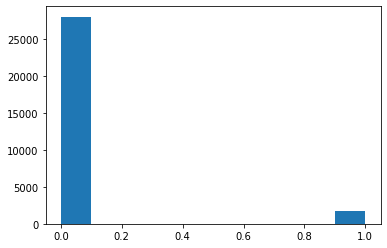

In [18]:
plt.hist(df_train[pd.isna(df_train["MonthlyIncome"])]["SeriousDlqin2yrs"]);

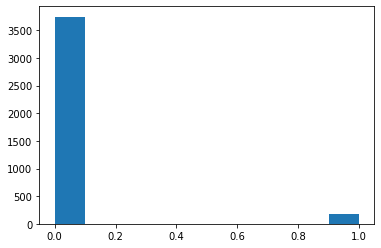

In [19]:
plt.hist(df_train[pd.isna(df_train["NumberOfDependents"])]["SeriousDlqin2yrs"]);

> So in this credit dataset, we have 150000 customers with 11 predictors

## 5.2 - Sampling and Data Split <a name="sklearn-split"></a><font size='3'>[Back to TOC](#toc)</font>


### $\Delta$ 5.2.1 - Sampling  <font size='3'>[Back to TOC](#toc)</font>

> When you have a large dataset, you can take a random sample or stratified sample and train the models on a subset on your laptop
> - `pandas.sample` or equivalent can be used for sampling. 

**Since the dataset is not very big, we decide NOT to do sampling. **


### $\Delta$ 5.1.2 - Data Splitting  <font size='3'>[Back to TOC](#toc)</font>


#### <font color='#FC7307'> $\delta$  Instruction

- Split your data into train and test
- Use 20% for testing

> Hint: `train_test_split` function in sklearn
    > set random_state=20210210

In [20]:
##################################
### Your Code Below
##################################

# split data into training(70%) and testing(30%); set a random seed for the sake of reproducibility
df = df_train#.dropna()
X = df.drop('SeriousDlqin2yrs',axis=1)
y = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20210210)


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 1   age                                   150000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 3   DebtRatio                             150000 non-null  float64
 4   MonthlyIncome                         120269 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 6   NumberOfTimes90DaysLate               150000 non-null  int64  
 7   NumberRealEstateLoansOrLines          150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 11.4 MB


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 72829 to 94197
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  120000 non-null  float64
 1   age                                   120000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  120000 non-null  int64  
 3   DebtRatio                             120000 non-null  float64
 4   MonthlyIncome                         96142 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       120000 non-null  int64  
 6   NumberOfTimes90DaysLate               120000 non-null  int64  
 7   NumberRealEstateLoansOrLines          120000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  120000 non-null  int64  
 9   NumberOfDependents                    116852 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 10.1 MB


In [23]:
y.head(5)

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

## 5.3 - Data Exploration <a name="sklearn-explore"></a><font size='3'>[Back to TOC](#toc)</font>


### $\Delta$ 5.3.1 - Explore the target distribution (default rate) <a name="env-variables"></a><font size='3'>[Back to TOC](#toc)</font>

> Column `SeriousDlqin2yrs` is the target variable we're interested in modeling. 


#### <font color='#FC7307'> $\delta$  Instruction
    
- The target variable is `SeriousDlqin2yrs`. It's an indicator of serious delinquncy in past 2 years. 
- Check the default/delinquent rate in the training dataset.
- Plot the target variable distribution using matplotlib or pd.series.plot() or df.plot()

Default Rate: 0.06684


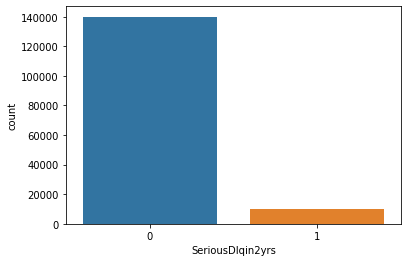

In [24]:
###################################
### Your Code Below
###################################

sns.countplot(x="SeriousDlqin2yrs", data=df)
print("Default Rate: {}".format(df["SeriousDlqin2yrs"].sum() / len(df)))


The default rate is 6.684%, implying this is an imbalanced classification problem. You can revisit the dataset later when we finish the discussions about the imbalanced classification topic.
By the way, 6.684% default rate in credit card portfolio is actually much higher than the actual numbers in big banks. Therefore, in reality the degree of imbalance is even more severe.

### $\Delta$ 5.3.2 - Univariate Data Exploration <a name="env-variables"></a><font size='3'>[Back to TOC](#toc)</font>

#### <font color='#FC7307'> $\delta$ Instructions

- Calculate summary statistics for numerical variables (df.describe??)
- Plot the histogram of each numeric feature (or one of them)
- Plot the boxplot of each numeric feature
- Plot the pariplot using seaborn's `sns.pairplot` module

In [25]:
##########################
# Your Code Below
##########################
#for col in df.columns:
#    print("Summary statistics: ", col, df[col].describe(), end = "\n\n")
descr = X_train.describe()
descr

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120000.000000,120000.000000,120000.000000,120000.000000,9.614200e+04,120000.000000,120000.000000,120000.000000,120000.000000,116852.000000
mean,5.621098,52.328292,0.428133,352.041463,6.676701e+03,8.443708,0.272308,1.017825,0.247158,0.754424
std,210.379305,14.782421,4.275222,2009.093016,1.555632e+04,5.129940,4.251922,1.126226,4.238538,1.114189
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029573,41.000000,0.000000,0.175138,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.153917,52.000000,0.000000,0.366923,5.388000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.558952,63.000000,0.000000,0.870291,8.212000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [26]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

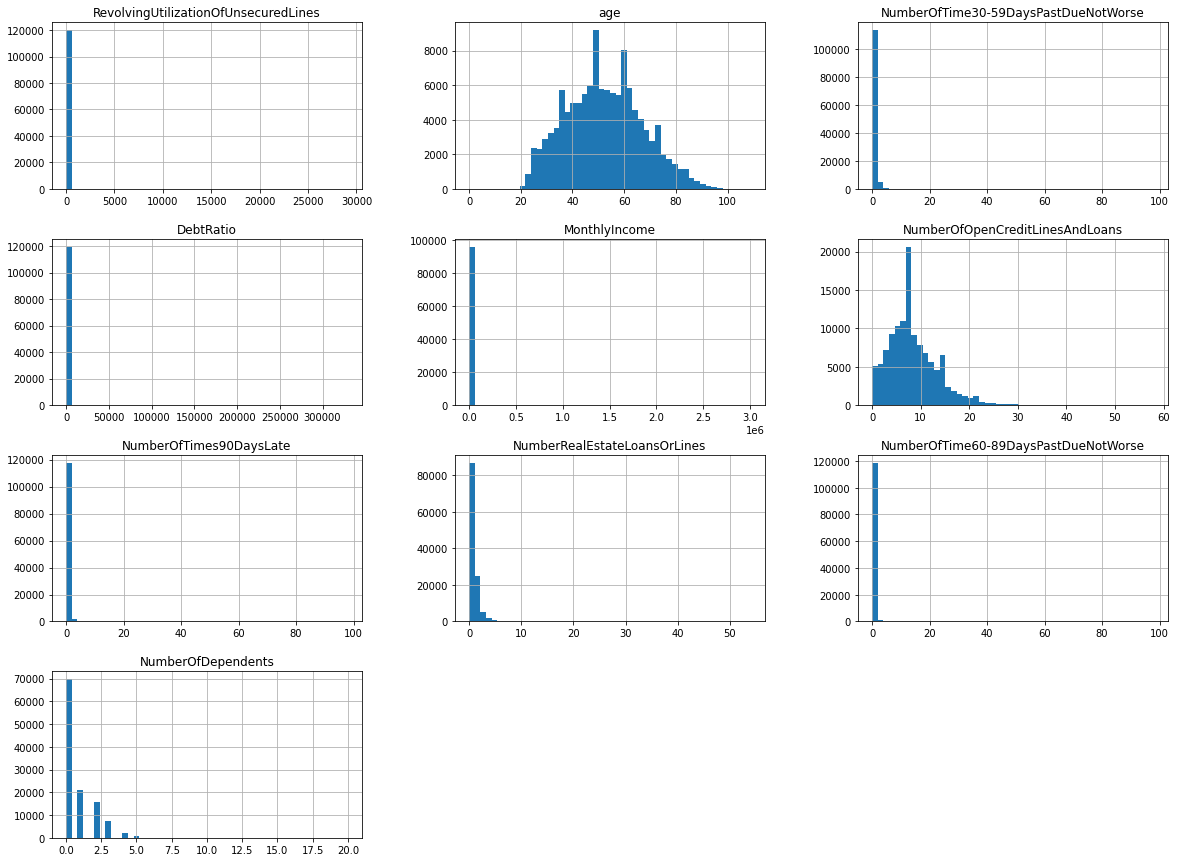

In [27]:
X_train.hist(bins=50, figsize=(20,15))
plt.show()

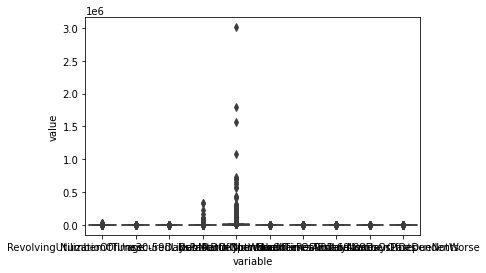

In [28]:
sns.boxplot(x="variable", y="value", data=pd.melt(X_train))


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


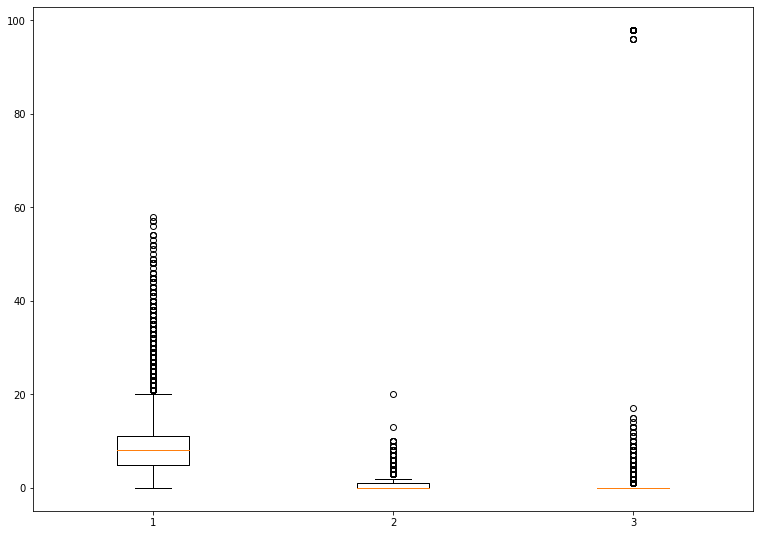

In [29]:
data_1 = X_train.RevolvingUtilizationOfUnsecuredLines	
data_2 = X_train.DebtRatio	
data_3 = X_train.NumberOfOpenCreditLinesAndLoans
data_4 = X_train.NumberOfDependents.dropna()
data_5 = X_train.NumberOfTimes90DaysLate
data = [data_3, data_4, data_5]
data_ = [data_1, data_2]
#data = [data_4]
fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
 
plt.show()

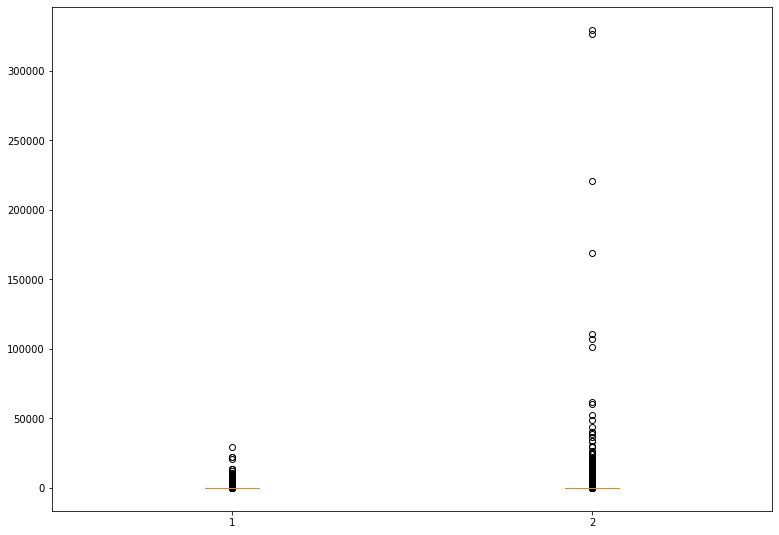

In [30]:
fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_)

plt.show()

In [31]:
#sns.pairplot(X_train)# too long

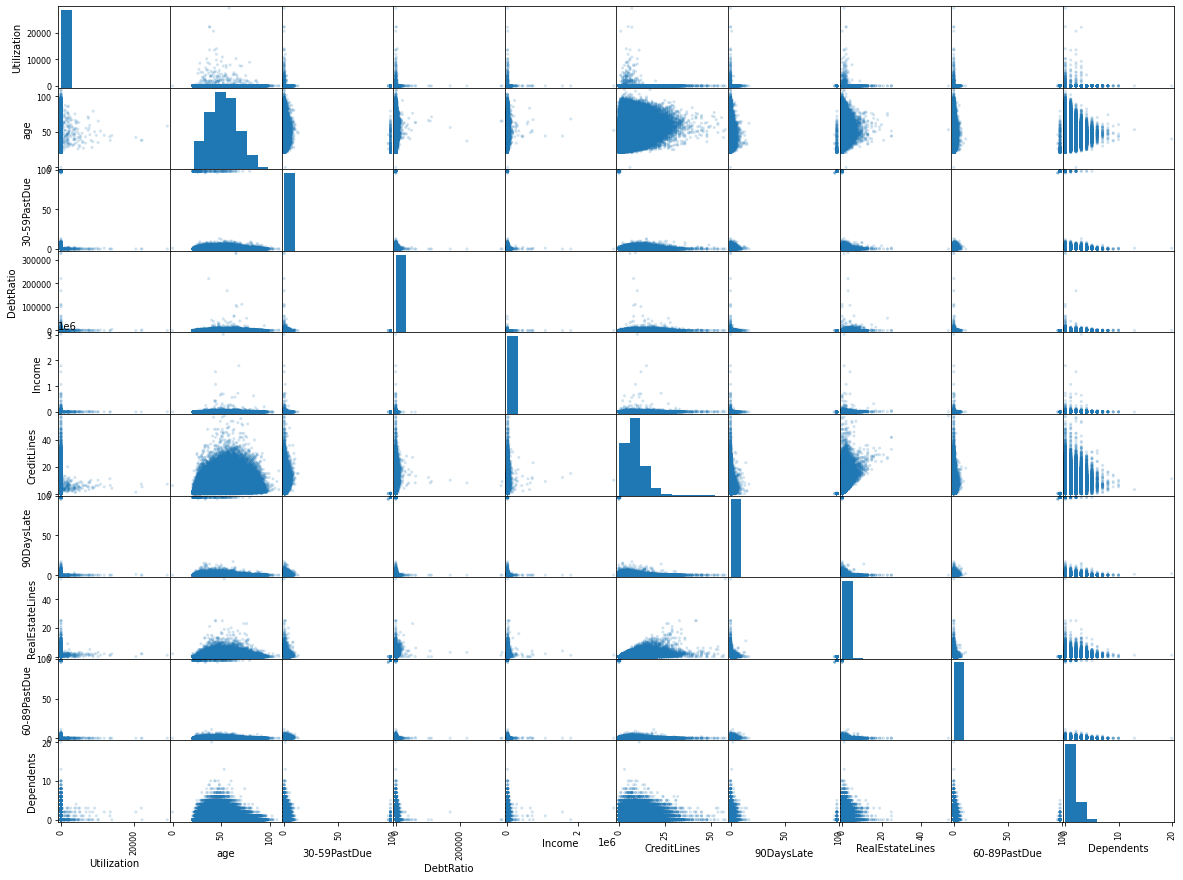

In [32]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(X_train.rename(columns = {
    "RevolvingUtilizationOfUnsecuredLines": "Utilization",
    "NumberOfTime30-59DaysPastDueNotWorse": "30-59PastDue",
    "MonthlyIncome": "Income",
    "NumberOfOpenCreditLinesAndLoans": "CreditLines",
    "NumberOfTimes90DaysLate": "90DaysLate",
    "NumberRealEstateLoansOrLines": "RealEstateLines",
    "NumberOfTime60-89DaysPastDueNotWorse": "60-89PastDue",
    "NumberOfDependents": "Dependents"
}), alpha=0.2, figsize = (20, 15));

**Note**
> Looks like some features have outliers. We can either deal with the outlier or choose an algorithm that is immune to outliers

#### <font color='#FC7307'> $\delta$ Deal with Categorical Variables
    
    
**Instructions**

- Create a categorical variable named `age_group` (Hint: pd.cut)
- Add the `age_group` variable to the dataframe
- Then explore the categorical feature `age_group` (Hint: bar plot, frequency count?)

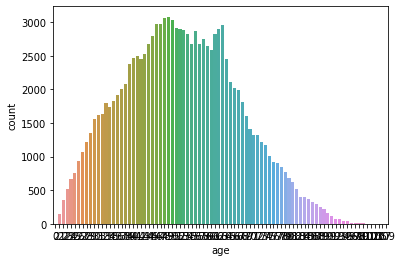

In [33]:
##########################
# Your Code Below
##########################
sns.countplot(x="age", data=X_train)
plt.show()


In [34]:
bins=[0,25,65,110]
labels=["youth", "adults", "seniors"]
mask = {
         'youth':1,
         'adults':2,
         'seniors':3}

In [35]:
# 1:youth, 2:adults", 3:seniors
AgeGroup_train = pd.cut(X_train["age"], bins=bins, labels=labels)
AgeGroup_test = pd.cut(X_test["age"], bins=bins, labels=labels)

In [36]:
X_train['AgeGroup'] = AgeGroup_train
X_test['AgeGroup'] = AgeGroup_test

In [37]:
X_train['AgeGroup'].replace(mask,inplace=True)
X_test['AgeGroup'].replace(mask,inplace=True)

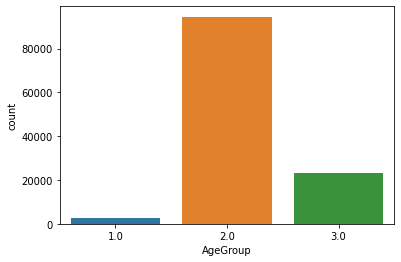

In [38]:
sns.countplot(x="AgeGroup", data=X_train)
plt.show()


In [39]:
X_train.AgeGroup.value_counts()

2.0    94565
3.0    22997
1.0     2437
Name: AgeGroup, dtype: int64

In [40]:
X_train['AgeGroup'].fillna(X_train['AgeGroup'].median(),inplace=True)
X_train.AgeGroup.value_counts()

2.0    94566
3.0    22997
1.0     2437
Name: AgeGroup, dtype: int64

#### <font color='#FC7307'> $\delta$ Check missing values

**Instructions**
    
- Find columns that have missing values

In [41]:
##########################
# Your Code Below
##########################

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [42]:
X_train.isna().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           23858
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3148
AgeGroup                                    0
dtype: int64

In [ ]:
 #MonthlyIncome
 #NumberOfDependents

### $\Delta$ 5.3.3 - Bivariate Data Exploration <a name="env-variables"></a><font size='3'>[Back to TOC](#toc)</font>


#### <font color='#FC7307'> $\delta$ Correlation Table
    
**Instruction**
    
- Can you create a correlation table and use dataframe style to apply background_gradient? 
    - Hint: df.corr()?

In [45]:
##########################
# Your Code Below
##########################
corr = X_train.corr()
print(corr)


                                      SeriousDlqin2yrs  \
SeriousDlqin2yrs                              1.000000   
RevolvingUtilizationOfUnsecuredLines         -0.001802   
age                                          -0.115386   
NumberOfTime30-59DaysPastDueNotWorse          0.125587   
DebtRatio                                    -0.007602   
MonthlyIncome                                -0.019746   
NumberOfOpenCreditLinesAndLoans              -0.029669   
NumberOfTimes90DaysLate                       0.117175   
NumberRealEstateLoansOrLines                 -0.007038   
NumberOfTime60-89DaysPastDueNotWorse          0.102261   
NumberOfDependents                            0.046048   

                                      RevolvingUtilizationOfUnsecuredLines  \
SeriousDlqin2yrs                                                 -0.001802   
RevolvingUtilizationOfUnsecuredLines                              1.000000   
age                                                              -0.0

[Text(0.5, 0, 'SeriousDlqin2yrs'),
 Text(1.5, 0, 'RevolvingUtilizationOfUnsecuredLines'),
 Text(2.5, 0, 'age'),
 Text(3.5, 0, 'NumberOfTime30-59DaysPastDueNotWorse'),
 Text(4.5, 0, 'DebtRatio'),
 Text(5.5, 0, 'MonthlyIncome'),
 Text(6.5, 0, 'NumberOfOpenCreditLinesAndLoans'),
 Text(7.5, 0, 'NumberOfTimes90DaysLate'),
 Text(8.5, 0, 'NumberRealEstateLoansOrLines'),
 Text(9.5, 0, 'NumberOfTime60-89DaysPastDueNotWorse'),
 Text(10.5, 0, 'NumberOfDependents')]

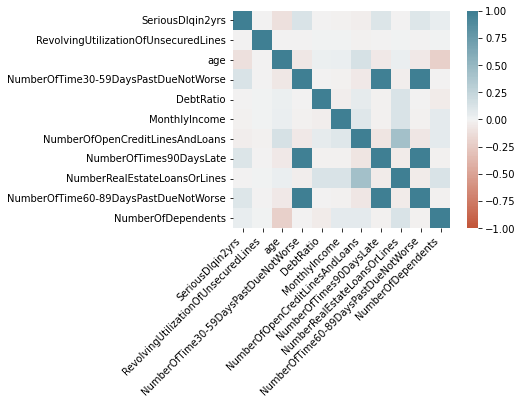

In [46]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

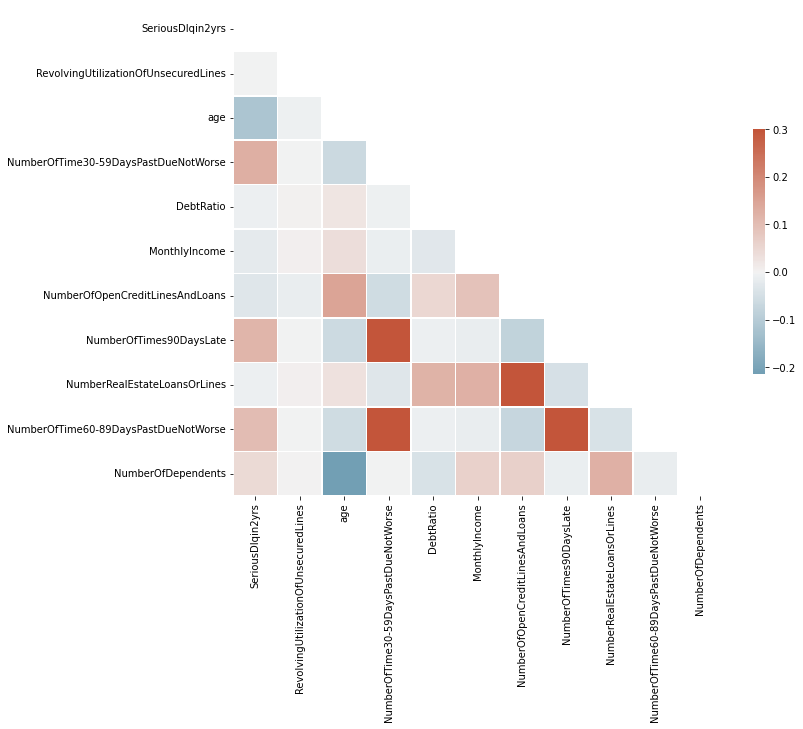

In [47]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#NumberOfTimes90DaysLate
#NumberOfTime30-59DaysPastDueNotWorse
#NumberOfTime60-89DaysPastDueNotWorse  

---

## 5.4 - Feature Preprocessing <a name="sklearn-feature"></a><font size='3'>[Back to TOC](#toc)</font>


### $\Delta$ 5.4.1 - Outliers <a name="outlier"></a><font size='3'>[Back to TOC](#toc)</font>


- Outliers will negatively affect the performance of our model, sklearn carries some packages that removes outliers based on the IQR.
- Let's remove the values for each column that are beyond the IQR range.
- We can either drop outliers our we can use the RobustScaler from sklearn to handle outliers.

#### <font color='#FC7307'> $\delta$ Deal with outliers

**Instruction**
- Find one of the variables with outliers and either replace the outliers with some values or remove the outliers
- You may also want to look into `from sklearn.preprocessing import RobustScaler`. It's ok to skip this step if time doesn't allow



In [51]:
##########################
# Your Code Below
##########################
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler


#transformer = RobustScaler().fit(X_train)
#X_train = transformer.transform(X_train)
#X_test = transformer.transform(X_test)


In [52]:
#X_train

### $\Delta$ 5.4.2 - Missing Value Imputation <a name="missing"></a><font size='3'>[Back to TOC](#toc)</font>


#### <font color='#FC7307'> $\delta$ Missing Imputation for NumberOfDependents
    
**Instruction**
    
- Fill missing values with `0`
- Apply the imputation to both train and test data
    - hint: df.fillna()

In [53]:
##########################
# Your Code Below
##########################
X_train.NumberOfDependents = X_train.NumberOfDependents.fillna(0)
X_test.NumberOfDependents = X_test.NumberOfDependents.fillna(0)



#### <font color='#FC7307'> $\delta$ Missing Imputation for MonthlyIncome

Around 19.8% of people do not have MonthlyIncome (could be an issue since MonthlyIncome is generally believed as an important predictor). The median values by each group (i.e. default/non-default) is chosen to fill in the NAs. Be careful that in order to do it, you have to split your data into training and testing first. 

**Instruction**
    
- Fill missing values with median value
- Apply the imputation to both train and test data
    - hint: df.fillna()

In [54]:
##########################
# Your Code Below
##########################
X_train.MonthlyIncome = X_train.MonthlyIncome.fillna(X_train['MonthlyIncome'].median())
X_test.MonthlyIncome = X_test.MonthlyIncome.fillna(X_test['MonthlyIncome'].median())
#X_test.AgeGroup = X_test.AgeGroup.fillna(X_test['AgeGroup'].median())


In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 72829 to 94197
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  120000 non-null  float64
 1   age                                   120000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  120000 non-null  int64  
 3   DebtRatio                             120000 non-null  float64
 4   MonthlyIncome                         120000 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       120000 non-null  int64  
 6   NumberOfTimes90DaysLate               120000 non-null  int64  
 7   NumberRealEstateLoansOrLines          120000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  120000 non-null  int64  
 9   NumberOfDependents                    120000 non-null  float64
 10  AgeGroup                              120000 non-null  float64
dt

In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 45741 to 51447
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  30000 non-null  float64
 1   age                                   30000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  30000 non-null  int64  
 3   DebtRatio                             30000 non-null  float64
 4   MonthlyIncome                         30000 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       30000 non-null  int64  
 6   NumberOfTimes90DaysLate               30000 non-null  int64  
 7   NumberRealEstateLoansOrLines          30000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  30000 non-null  int64  
 9   NumberOfDependents                    30000 non-null  float64
 10  AgeGroup                              30000 non-null  int64  
dtypes: float64(

## 5.5 - Feature Selection <a name="sklearn-feature-selection"></a><font size='3'>[Back to TOC](#toc)</font>


- NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse have a high correlation with each other, let's remove some of these features so we don't have any multicollinearity.
    - Let's remove some of these features.
- After training your model, during the model interpretation stage (5.10), you may realize that some of the features have little to no importance / impact , you can repeat this and remove some of the features later


#### <font color='#FC7307'> $\delta$ Feature Selection
    
    
**Instruction**
    
- Use the correlation table to identify highly correlated features
- Drop the redundant features. 
    - hint: df.drop()
    
- If you have time later, look into a better way to remove redundant features. 

**Reference**
- [https://scikit-learn.org/stable/modules/feature_selection.html](https://scikit-learn.org/stable/modules/feature_selection.html)

In [61]:
##########################
# Your Code Below
##########################
##X_train = X_train.drop(["NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTime30-59DaysPastDueNotWorse","age", "AgeGroup"], axis=1 )
##X_test = X_test.drop(["NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTime30-59DaysPastDueNotWorse","age", "AgeGroup"], axis=1 )
#X_train = X_train.drop(["NumberOfTime30-59DaysPastDueNotWorse"], axis=1 )
#X_test = X_test.drop(["NumberOfTime30-59DaysPastDueNotWorse"], axis=1 )


In [72]:
from sklearn.feature_selection import SelectFromModel

def feature_select(clf, X_):
  model = SelectFromModel(clf, prefit=True)
  X_new = model.transform(X_)
  return X_new
        


In [63]:
print('Train Shapes',X_train.shape,' and ',y_train.shape,'\nTest Shapes',X_test.shape,' and ' ,y_test.shape)

Train Shapes (120000, 11)  and  (120000,) 
Test Shapes (30000, 11)  and  (30000,)


In [64]:
# Normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
transformer = RobustScaler().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

## 5.6 - Model Fitting <a name="sklearn-fit"></a><font size='3'>[Back to TOC](#toc)</font>


#### <font color='#FC7307'> $\delta$ Modelling


**Instruction**

1. Pick one of the algorithms learned today: `statsmodels.OLS` or skleanr's `RandomForestClassifier` 2. Instantiate the model instance
3. Fit the model to the training set (X_train, y_train)
4. Use the model to predict on the testing set (X_test)
5. Use evaluation metric to see how model is performing (classification_report)

In [66]:
##########################
# Your Code Below
##########################
clf = RandomForestClassifier()
clf.fit(X_train,y_train)


RandomForestClassifier()

In [69]:
pred = clf.predict_proba(X_test)[:,1]

In [ ]:
#pd.DataFrame(clf.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

In [70]:
clf.feature_importances_

array([0.19523962, 0.12262791, 0.05191372, 0.17735528, 0.14657322,
       0.08947083, 0.08680981, 0.03480951, 0.0466211 , 0.04221999,
       0.006359  ])

In [75]:
X_new_train = feature_select(clf, X_train)
X_new_train.shape

(120000, 4)

In [ ]:
#Feature Importance: AgeGroup	0.006399

In [76]:
pred_binary = [int(x > 0.5) for x in pred]

In [77]:
from sklearn.metrics import classification_report
target_names = ["Yes", "No"]
print(classification_report(y_test, pred_binary, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.94      0.99      0.96     27898
          No       0.57      0.19      0.28      2102

    accuracy                           0.93     30000
   macro avg       0.75      0.59      0.62     30000
weighted avg       0.92      0.93      0.92     30000



## 5.7 - Model Evaluation <a name="sklearn-eval"></a><font size='3'>[Back to TOC](#toc)</font>


- The classification report will return a summary of useful metrics to help with model evaluation.

#### <font color='#FC7307'> $\delta$ Baseline Model Evaluation
    
**Instruction**
    
- Can you tell us the accuracy or precision of your model evaluated on the test data? 
    - Hint: Use sklearn's `classification_report` or `sklearn.metrics.accuracy_score`

In [78]:
##########################
# Your Code Below
##########################
print(roc_auc_score(y_test, pred))


0.8399461535801311


In [79]:
from sklearn.metrics import auc,roc_curve
def plot_roc(pred):
    fpr,tpr,_ = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    sns.lineplot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


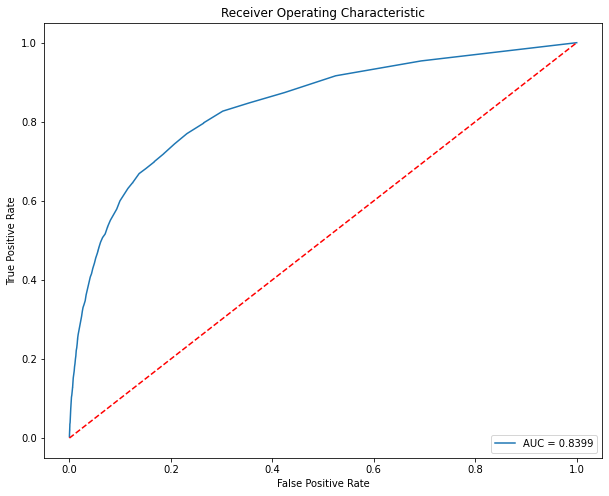

In [80]:
plot_roc(pred)

## 5.8 - Hyper-Parameter Tuninng & Cross Validation <a name="sklearn-eval"></a><font size='3'>[Back to TOC](#toc)</font>


In [81]:
##########################
# Your Code Below
##########################

# Number of trees in random forest
n_estimators = [200, 300, 350]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [8, 10, 12]
# Minimum number of samples required to split a node
#min_samples_split = [2, 5,10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [5,20,50]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}


In [82]:
from sklearn.model_selection import RandomizedSearchCV
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               #verbose=2,
                               random_state=20210210, n_jobs = -1)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [8, 10, 12],
                                        'n_estimators': [200, 300, 350]},
                   random_state=20210210)

In [83]:
rf_random.best_params_

{'n_estimators': 300, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}

In [84]:
pred_random = rf_random.predict(X_test)

In [85]:
pred_random_binary = [int(x > 0.5) for x in pred_random]

In [86]:
print(classification_report(y_test, pred_random_binary, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.94      0.99      0.97     27898
          No       0.65      0.16      0.26      2102

    accuracy                           0.94     30000
   macro avg       0.79      0.58      0.61     30000
weighted avg       0.92      0.94      0.92     30000



In [87]:
print(roc_auc_score(y_test, pred_random))

0.5786952831229218


## 5.9 - Model Interpretation <a name="sklearn-eval"></a><font size='3'>[Back to TOC](#toc)</font>


In [ ]:
##########################
# Your Code Below
##########################